In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'C:\Users\RUSHI\Desktop\b daily practice\project\Zomato\Zomato.csv')

In [3]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [5]:
data.rate.describe()

count     43942
unique       64
top         NEW
freq       2208
Name: rate, dtype: object

In [6]:
data['rate']=data['rate'].replace("NEW",np.nan)

In [7]:
data.dropna(how='any',inplace=True)

In [8]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [9]:
data.drop(columns=['url','address','phone','location'],inplace=True)

In [10]:
data.head()

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [11]:
data.rename(columns={'approx_cost(for two people)': 'average_cost', 'listed_in(city)': 'locality','listed_in(type)': 'restaurant_type'}, inplace=True)

In [12]:
x=data
x.rate=x.rate.astype(str)
x.rate=x.rate.apply(lambda x:x.replace('/5',''))
x.rate=x.rate.apply(lambda x: float(x))
x.head()

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


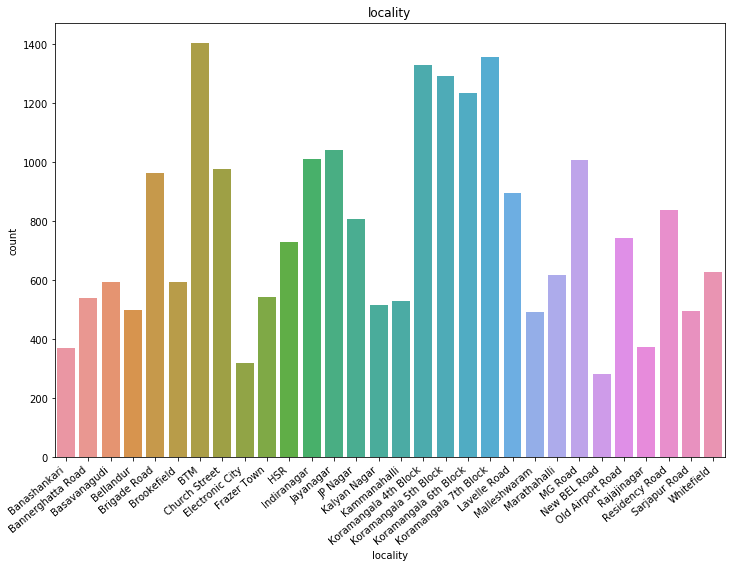

In [13]:
plt.figure(figsize=(12,8))
g=sns.countplot(data['locality'])
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
plt.title("locality")
g

Text(0.5, 1.0, 'resturant type')

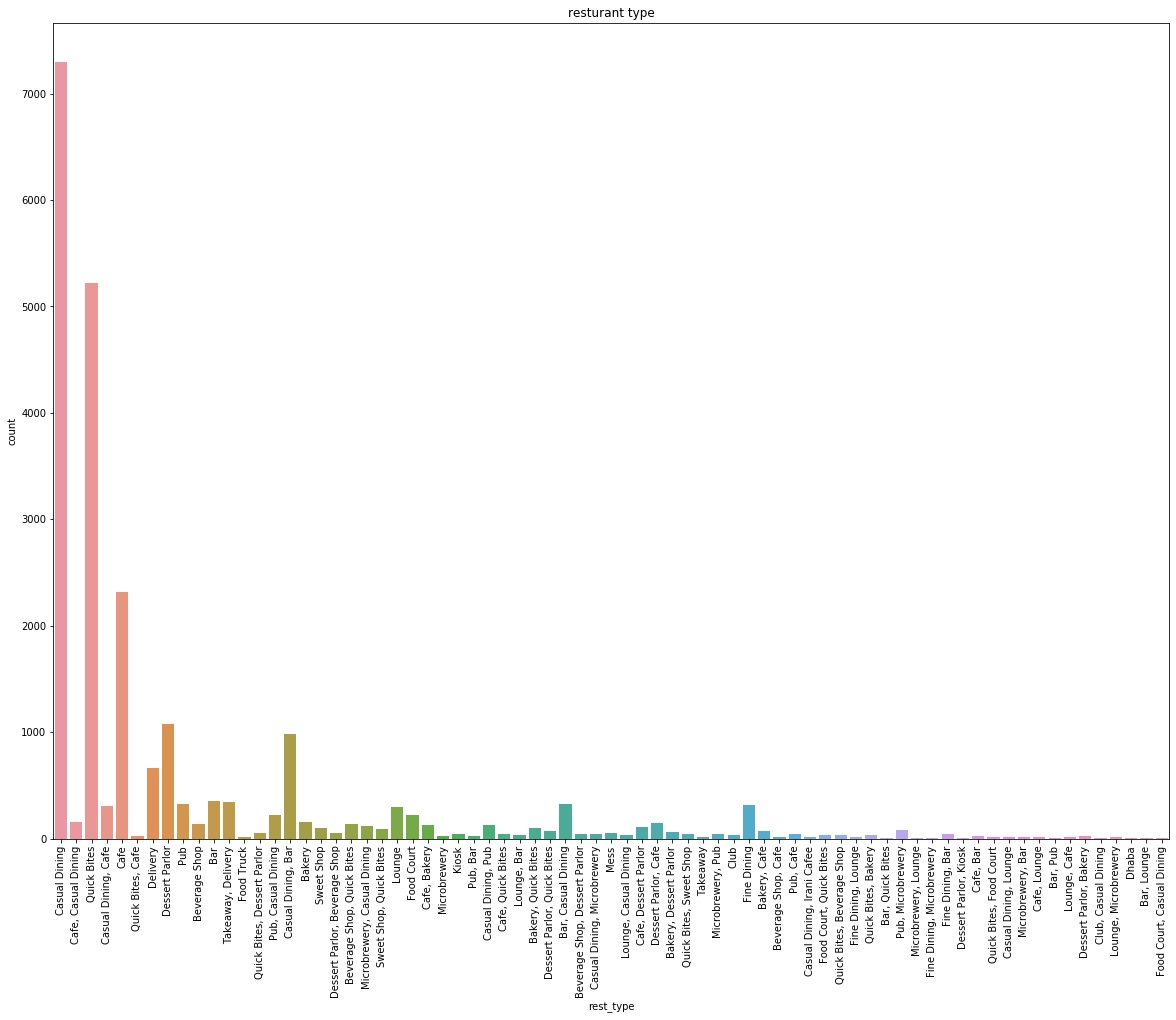

In [14]:
plt.figure(figsize=(20,15))
g=sns.countplot(data['rest_type'])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g
plt.title("resturant type")

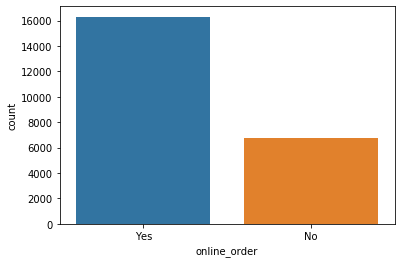

In [15]:
sns.countplot(data['online_order'])

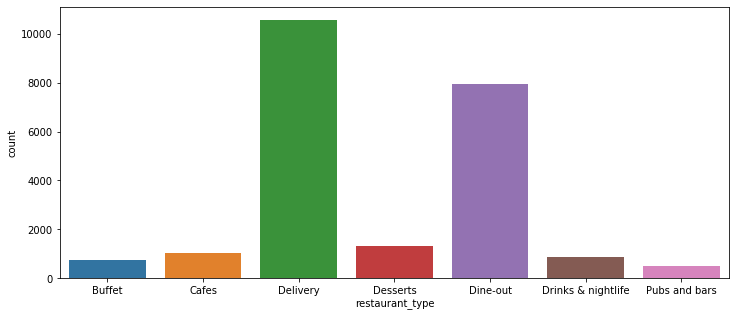

In [16]:
plt.figure(figsize=(12,5))
sns.countplot(data['restaurant_type'])

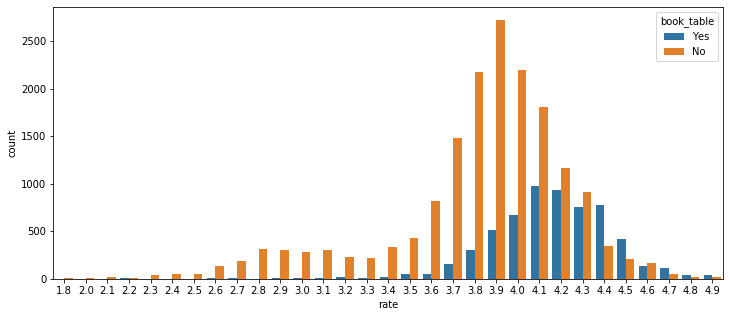

In [17]:
plt.figure(figsize=(12,5))
sns.countplot(data['rate'],hue=data['book_table'])

In [18]:
x.average_cost=x.average_cost.apply(lambda x:x.replace(',',''))
x.average_cost=x.average_cost.astype(int)

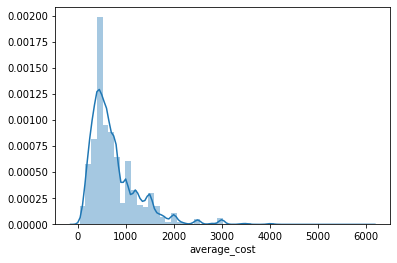

In [19]:
sns.distplot(x['average_cost'])

In [20]:
data['restaurant_type'].value_counts()

Delivery              10575
Dine-out               7954
Desserts               1330
Cafes                  1046
Drinks & nightlife      871
Buffet                  753
Pubs and bars           517
Name: restaurant_type, dtype: int64

In [21]:
label=['Delivery','Dine-out','Desserts','Cafes','Drinks & nightlife','Buffet','Pubs and bars']

([<matplotlib.patches.Wedge at 0x1df811cecc8>,
 [Text(0.14175747575781694, 1.0908275840236037, 'Delivery'),
  Text(-0.7457527117726794, -0.8086117071151612, 'Dine-out'),
  Text(0.5471404865513291, -0.9542731726169269, 'Desserts'),
  Text(0.8223972597896532, -0.7305222427075508, 'Cafes'),
  Text(0.9832125985918074, -0.4932473882042817, 'Drinks & nightlife'),
  Text(1.0675232832319939, -0.26531875123629, 'Buffet'),
  Text(1.0972693002220457, -0.07746020133089118, 'Pubs and bars')],
 [Text(0.07732225950426379, 0.5949968640128747, '46%'),
  Text(-0.40677420642146145, -0.44106093115372424, '35%'),
  Text(0.298440265391634, -0.5205126396092328, '6%'),
  Text(0.44858032352162897, -0.39846667784048223, '5%'),
  Text(0.5362977810500767, -0.2690440299296082, '4%'),
  Text(0.5822854272174511, -0.14471931885615816, '3%'),
  Text(0.598510527393843, -0.04225101890775882, '2%')])

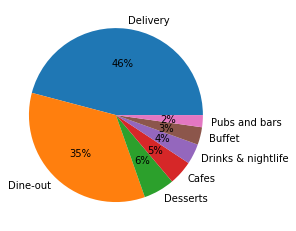

In [22]:
plt.pie(data['restaurant_type'].value_counts(),labels=label,autopct='%1.0f%%')

In [23]:
newrate=data[data['rate']>=4.5]

In [24]:
newrate['rate'].value_counts()

4.5    630
4.6    294
4.7    167
4.8     66
4.9     55
Name: rate, dtype: int64

In [25]:
x['votes'].describe()

count    23046.000000
mean       604.908444
std       1117.367014
min          0.000000
25%        103.000000
50%        224.000000
75%        591.000000
max      16832.000000
Name: votes, dtype: float64

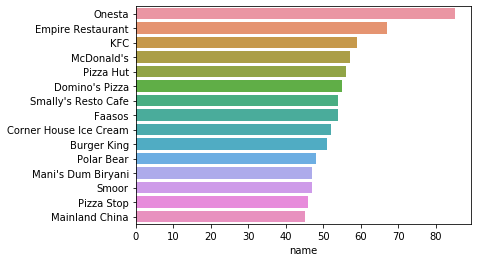

In [26]:
frs=x['name'].value_counts()[:15]
sns.barplot(x=frs,y=frs.index)